<img src="anatomy.webp" alt="anatomy" title="Anatomy of Figure" width="650" />

<img src="empty_gridspec_annot.webp" alt="anatomy" title="Anatomy of Figure" width="650" />

<img src="fig_map.webp" alt="anatomy" title="Anatomy of Figure" width="650" />

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)
# %matplotlib notebook
%matplotlib inline

In [ ]:
fig, _ = plt.subplots()

type(fig)

In [ ]:
fig, ax = plt.subplots()

In [ ]:
type(ax)

In [ ]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng
fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(left=yrs[0], right=yrs[-1])
fig.tight_layout()

Here’s what’s going on above:

After creating three random time series, we defined one Figure (fig) containing one Axes (a plot, ax).

We call methods of ax directly to create a stacked area chart and to add a legend, title, and y-axis label. Under the object-oriented approach, it’s clear that all of these are attributes of ax.

tight_layout() applies to the Figure object as a whole to clean up whitespace padding.

In [2]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [3]:
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

In [4]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

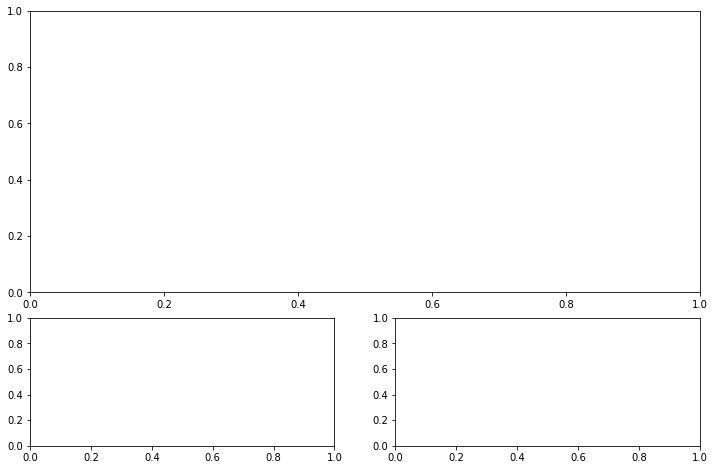

In [14]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

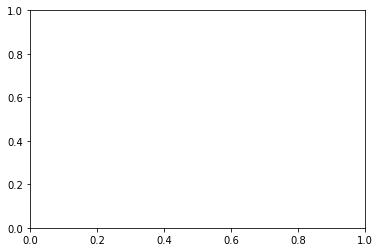

In [18]:
ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')


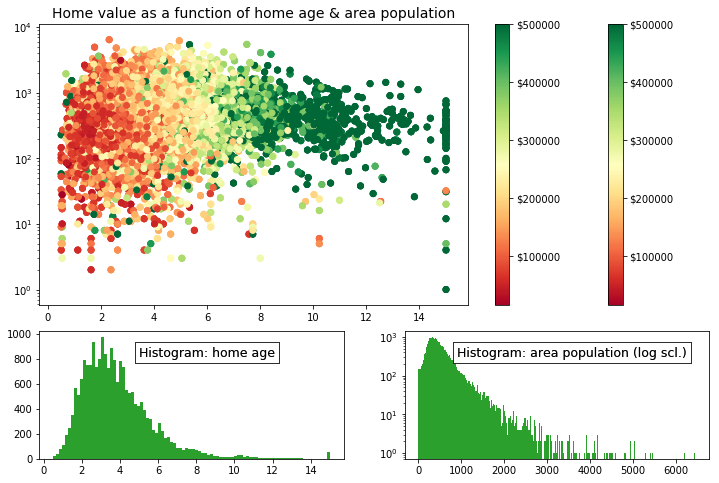

In [19]:
fig